In [15]:
import http.client
import typing
import urllib.request
from vertexai.preview import generative_models
from vertexai.preview.generative_models import Content,GenerationConfig,Part
from PIL import Image
import io

In [34]:
# create helper function
def load_image_from_url(image_url: str, display_size: tuple = (200,200)) -> Image:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
        image_to_show = Image.open(io.BytesIO(image_bytes))
        image_to_show.resize(display_size).show()
    return generative_models.Image.from_bytes(image_bytes)

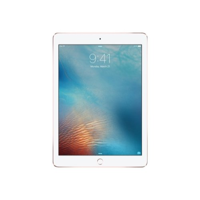

In [35]:
product_1_name = "iPad Pro 9.7-inch (32GB, Wi-Fi, Rose Gold) MM172LL/A 2016 Model, case included"
product_1_image = load_image_from_url(
    "https://images-na.ssl-images-amazon.com/images/I/417h-Qp3TWL.jpg"
)

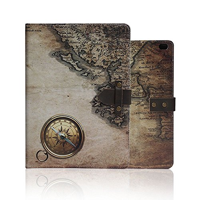

In [4]:
product_2_name = """
iPad Air Case,DINGRICH Retro Compass PU leather Folio Case Cover with Smart Feature(Built-In Magnet For Sleep/Wake Feature)
for iPad Air(2013 Release Only)Screen Protector+Stylus Include(A12)
"""
product_2_image = load_image_from_url(
    "https://images-na.ssl-images-amazon.com/images/I/51OMM%2B8ofmL.jpg"
)

In [23]:
# Pass multimodal prompt
model = generative_models.GenerativeModel("gemini-pro-vision")
response = model.generate_content(
    [f"""
    Does this item contain a lithium ion battery?
    Product Name: {product_1_name}
    """,
    product_1_image,
    ],
    generation_config=GenerationConfig(temperature=0,
    top_k=1)
)
print(response.text)

 Yes, this item contains a lithium ion battery.


In [24]:
# Pass multimodal prompt
model = generative_models.GenerativeModel("gemini-pro-vision")
response = model.generate_content(
    [f"""
    Does this item contain a lithium ion battery?
    Product Name: {product_2_name}
    """,
    product_2_image,
    ],
    generation_config=GenerationConfig(temperature=0,
    top_k=1)
)
print(response.text)

 No, this product does not contain a lithium ion battery.


In [25]:
# Pass multimodal prompt
model = generative_models.GenerativeModel("gemini-pro")
response = model.generate_content(
    [f"""
    Does this item contain a lithium ion battery?
    Product Name: {product_1_name}
    """
    ],
    generation_config=GenerationConfig(temperature=0,
    top_k=1)
)
print(response.text)

Yes, the iPad Pro 9.7-inch (32GB, Wi-Fi, Rose Gold) MM172LL/A 2016 Model contains a lithium-ion battery.


In [27]:
# Pass multimodal prompt
model = generative_models.GenerativeModel("gemini-pro")
response = model.generate_content(
    [f"""
    Does this item contain a lithium ion battery?
    Product Name: {product_2_name}
    """
    ],
    generation_config=GenerationConfig(temperature=0,
    top_k=1)
)
print(response.text)

The provided context does not specify whether the iPad Air Case contains a lithium ion battery. Therefore, I cannot answer this question.


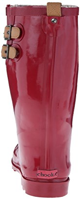

In [39]:
product_3_name = """
Chooka Women's Top Solid Rain Boot
"""
product_3_image = load_image_from_url(
    "https://images-na.ssl-images-amazon.com/images/I/31Bjdh8txPL.jpg",
    display_size=(80,200)
)

In [29]:
# Pass multimodal prompt
model = generative_models.GenerativeModel("gemini-pro-vision")
response = model.generate_content(
    [f"""
    Provide the color and material for the item in json format, 
    for example <color: black, material: silk>
    Product Name: {product_3_name}
    """,
    product_3_image,
    ],
    generation_config=GenerationConfig(temperature=0,
    top_k=1)
)
print(response.text)

 ```json
{
  "color": "red",
  "material": "rubber"
}
```
